In [10]:
import pandas as pd
pd.options.display.max_rows = 50
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

# api https://live.euronext.com/fr/intraday_chart/getDetailedQuoteAjax/FR0000130452-XPAR/full

In [2]:
df= pd.read_excel("dataAmsterdam.xlsx")
df.drop([0,1,2], inplace=True)
df.reset_index(drop=True, inplace=True)


In [22]:
def getMarketCap(ISIN):
    url = f"https://live.euronext.com/en/intraday_chart/getDetailedQuoteAjax/{ISIN}-XAMS/full"
    response = requests.get(url)
    if(response.ok):
        soup = BeautifulSoup(response.text)
        try:
            capitalization = soup.find("tbody").findAll('tr')[11].find(class_="font-weight-medium").text
            print(capitalization)
            return capitalization
        except IndexError:
            return 0

def convertToInt(ISIN):
    if(type(ISIN)==str):
        if("B" in ISIN):
            return (float(ISIN.replace("B","")))
        return 0

def getMarketCapInt(ISIN):
    return convertToInt(getMarketCap(ISIN))

In [25]:
def addMarketCap():
    for i, row in df.iterrows():
        if(i<200):
            print(row['ISIN'])
            df.at[i,'MarketCap'] = getMarketCapInt(row['ISIN'])
            print(i)
    df.sort_values(by='MarketCap', ascending=False,ignore_index=True, inplace=True)
addMarketCap()

NL0000852564
 5.903B 
0
NL0011540547
 5.856B 
1
NL0009767532
 1.010B 
2
NL0006294274
3
FR0000031122
4
GB00BQQFX454
 365.518M 
5
FR0012821890
6
NL0012969182
 73.918B 
7
BE0003851681
8
NL0000303709
 8.253B 
9
NL0011794037
 31.712B 
10
NL0000018034
 270.417M 
11
NL0013267909
 17.947B 
12
NL0012817175
 1.859B 
13
GB00BNTJ3546
 9.256B 
14
NL0010696704
 14.571M 
15
NL0012194724
 6.016M 
16
NL0000888691
 795.052M 
17
NL0000313286
 718.839M 
18
LU0569974404
 3.441B 
19
NL0006237562
 3.480B 
20
LU1598757687
 23.828B 
21
NL0000334118
 19.103B 
22
NL0010273215
 283.378B 
23
NL0011872643
 5.180B 
24
JE00B3DCF752
 1.397B 
25
NL0012047823
 107.512M 
26
LU1789205884
 611.127M 
27
NL0000337319
 721.430M 
28
NL0011872650
 2.480B 
29
NL0012866412
 6.361B 
30
NL0000339703
 135.389M 
31
NL0000285278
 63.454M 
32
NL0000852580
 3.108B 
33
GG00B1FQG453
 279.833M 
34
GG00B39VMM07
 2.945M 
35
NL0000442523
 40.863M 
36
NL0010776944
 520.919M 
37
NL0012747059
 829.375M 
38
GB00BDCPN049
 20.304B 
39
NL0010583399


In [26]:
def removeNonDutchCompany():
    index=[]
    for i, row in df.iterrows():
        if(not('NL' in df.loc[i]['ISIN'])):
            index.append(i)
    df.drop(index, inplace=True)
    df.reset_index(drop=True, inplace=True)
removeNonDutchCompany()

In [61]:
def pieByPercent(i,size=150):
    plt.rcParams['figure.dpi'] = size
    plt.rcParams['savefig.dpi'] = size
    name = df['Name'].to_list()
    marketCap = df['MarketCap'].to_list()
    plt.pie(marketCap[0:i], labels =name[0:i], wedgeprops={'edgecolor':'black', 'linewidth': 0.5}, autopct='%1.1f%%', textprops={'fontsize': 1500/size})
    plt.title(f"Largest {i} Dutch companies listed on Euronext Amsterdam")
    plt.savefig(f"amsterdam{i}") 

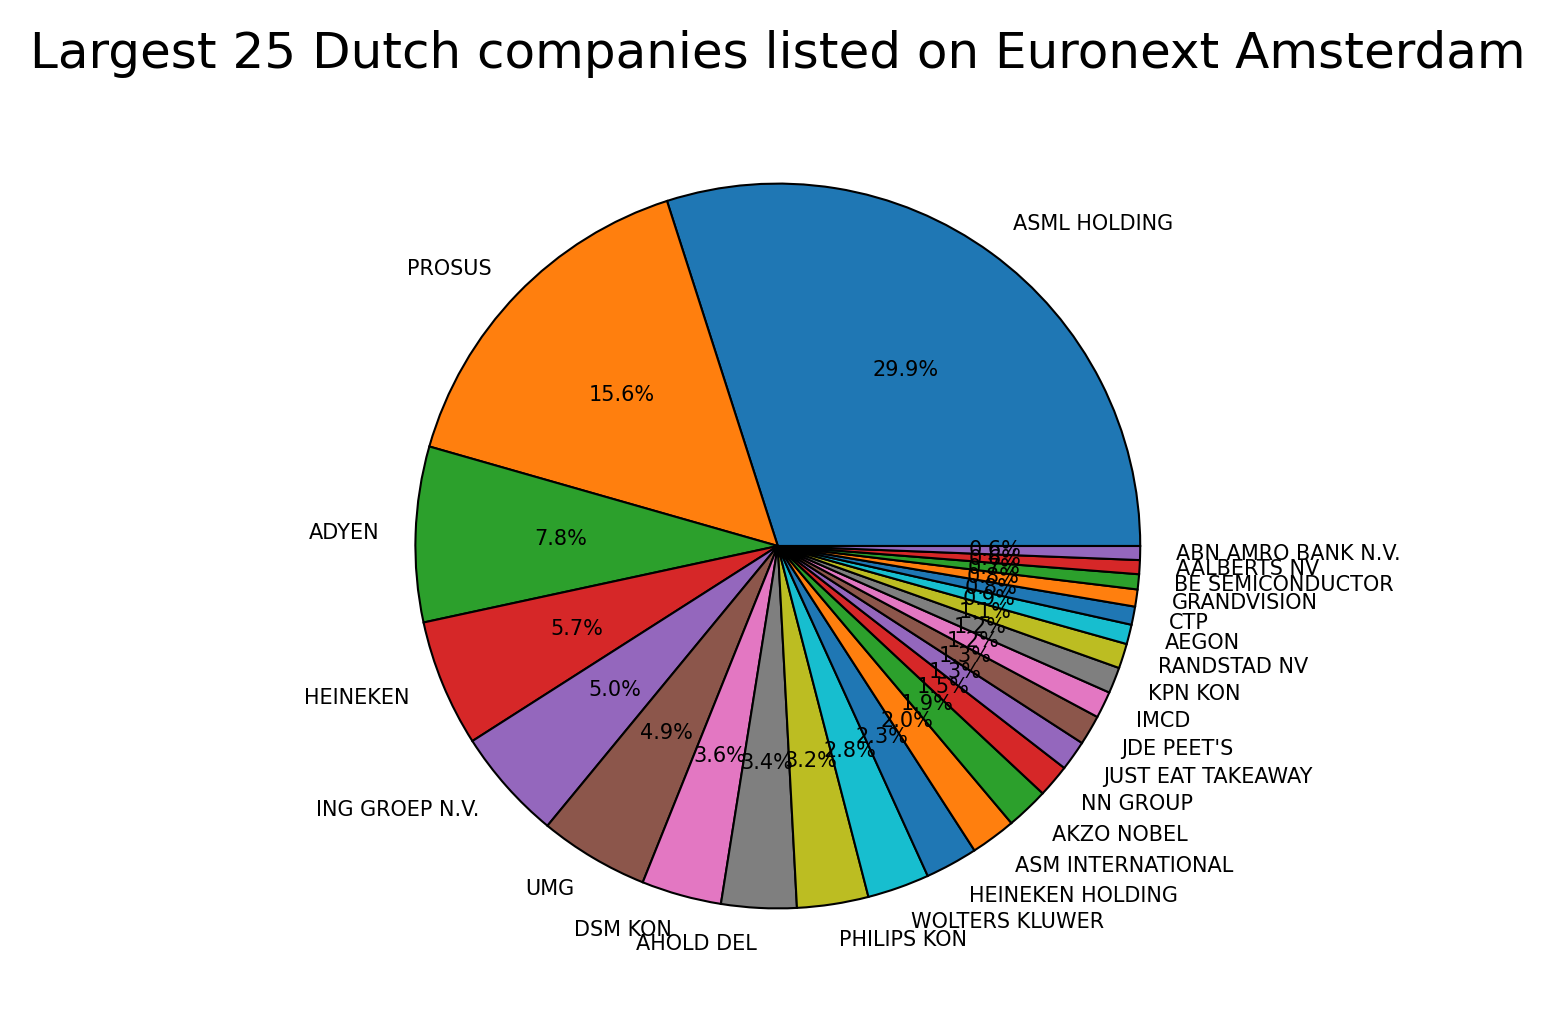

In [62]:
pieByPercent(25,300)